In [9]:
%cd /media/saeed/Expansion/ASU/md-intro-tutorial/ml_project/Keresten/data/Rg/

/media/saeed/Expansion/ASU/md-intro-tutorial/ml_project/Keresten/data/Rg


In [20]:
df = pd.read_csv('IDRome_DB.csv')
print (df.head)

<bound method NDFrame.head of                  seq_name  UniProt_ID    N     nu        SPR  ete2_Rg2  \
0      A0A024RBG1_145_181  A0A024RBG1   37  0.558  10.284649  6.304027   
1         A0A075B6T7_1_32  A0A075B6T7   32  0.525  10.092351  6.114494   
2         A0A087WTH1_1_67  A0A087WTH1   67  0.532  10.160125  6.069995   
3        A0A087WTH5_1_132  A0A087WTH5  132  0.496  10.049124  6.150972   
4         A0A087WV53_1_46  A0A087WV53   46  0.567  10.212765  6.439589   
...                   ...         ...  ...    ...        ...       ...   
28053        Q9Y6Z4_1_181      Q9Y6Z4  181  0.493  10.006512  5.748098   
28054        Q9Y6Z5_1_254      Q9Y6Z5  254  0.528   9.830710  6.153759   
28055        Q9Y6Z7_1_109      Q9Y6Z7  109  0.546  10.025622  6.175505   
28056        W6CW81_1_113      W6CW81  113  0.519  10.084249  6.191149   
28057        X6R8D5_1_127      X6R8D5  127  0.514  10.121092  5.920053   

              S     Delta     Rg/nm     Ree/nm  ...  gene_name   QCDpred  \
0    

Mean Squared Error: 0.0004953539367787003
R-squared: 0.9998166417923333


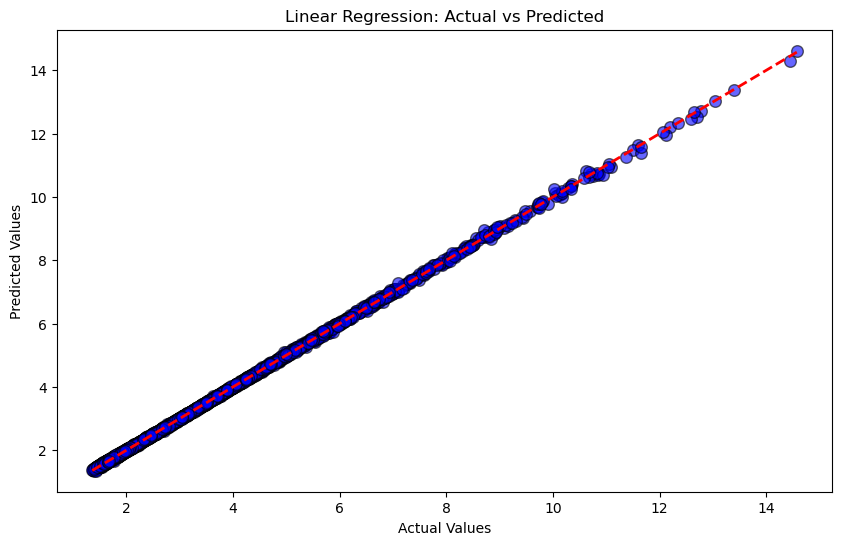

In [28]:
# thankGOD@ with all 34 features
# our data set has all IDP proteins( 28058 data point).
# thankGOD! our first ML model on the actual data of proteins.
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Replace 'your_file.csv' with the path to your CSV file
#df = pd.read_csv('df_validation_IDRome90.csv')
df = pd.read_csv('IDRome_DB.csv', usecols=['Rg/nm', 'nu', 'SPR','ete2_Rg2','z_delta_+-','z_omega_pi','z_omega_+','z_omega_-','z_omega_h',
                                           'fdomain','nu_svr','SPR_svr','mean_lambda','scd','fcr','S','Delta','Rh/nm','fK','fR','fE','fD',
                                           'faro','shd','kappa','ncpr','is_btw_folded','is_nterm','is_cterm','is_idp','first','last','N_FL',
                                           'QCDpred', 'Ree/nm'])
# with just one feature 'Ree' we can perfectily predict Rg
#df = pd.read_csv('IDRome_DB.csv', usecols=['Rg/nm','Ree/nm'])



# Separate the target (Rg) and features
X = df.drop(columns=['Rg/nm'])  # Features (all columns except 'Rg')
y = df['Rg/nm']  # Target (only the 'Rg' column)
#print(y)
# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#print(X_train)
#print(y_train)
#print(X_test)
#print(y_test)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Visualization of results
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.6, s=70)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression: Actual vs Predicted')
plt.show()


Mean Squared Error: 0.2625748029758534
R-squared: 0.9028063740339578


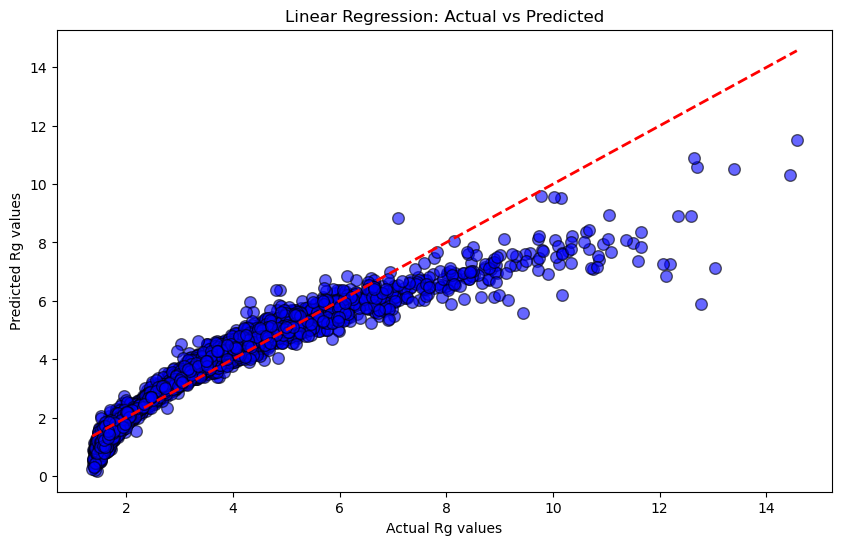

In [3]:
#we should use only the sequence features and not conformatinal features. so we only have 8 features.
# our data set has all IDP proteins( 28058 data point).
# thankGOD! our first ML model on the actual data of proteins.
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Replace 'your_file.csv' with the path to your CSV file
#df = pd.read_csv('df_validation_IDRome90.csv')
df = pd.read_csv('IDRome_DB.csv', usecols=['Rg/nm','mean_lambda','nu_svr','scd','fcr',
                                           'faro','shd','ncpr'])
# with just one feature 'Ree' we can perfectily predict Rg
#df = pd.read_csv('IDRome_DB.csv', usecols=['Rg/nm','Ree/nm'])



# Separate the target (Rg) and features
X = df.drop(columns=['Rg/nm'])  # Features (all columns except 'Rg')
y = df['Rg/nm']  # Target (only the 'Rg' column)
#print(y)
# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#print(X_train)
#print(y_train)
#print(X_test)
#print(y_test)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Visualization of results
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.6, s=70)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Rg values')
plt.ylabel('Predicted Rg values')
plt.title('Linear Regression: Actual vs Predicted')
plt.show()

Mean Squared Error: 0.02193536245709995
R-squared: 0.9918804950439932


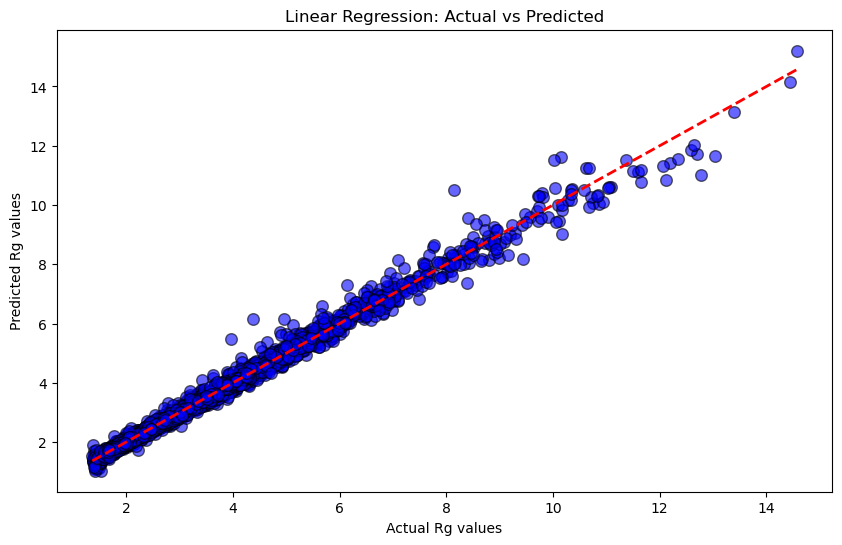

In [14]:
#thankGOD! polynomial model
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
import joblib

# Replace 'your_file.csv' with the path to your CSV file
#df = pd.read_csv('df_validation_IDRome90.csv')
df = pd.read_csv('IDRome_DB.csv', usecols=['Rg/nm','mean_lambda','nu_svr','scd','fcr',
                                           'faro','shd','ncpr'])
# with just one feature 'Ree' we can perfectily predict Rg
#df = pd.read_csv('IDRome_DB.csv', usecols=['Rg/nm','Ree/nm'])



# Separate the target (Rg) and features
X = df.drop(columns=['Rg/nm'])  # Features (all columns except 'Rg')
y = df['Rg/nm']  # Target (only the 'Rg' column)
#print(y)
# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#print(X_train)
#print(y_train)
#print(X_test)
#print(y_test)

# Using a polynomial degree of 2 for demonstration
poly_model = make_pipeline(PolynomialFeatures(degree=3), LinearRegression())
poly_model.fit(X_train, y_train)
y_pred_poly = poly_model.predict(X_test)

# to save the trained model
joblib.dump(poly_model, 'poly_model.joblib')

# Evaluate the model
mse = mean_squared_error(y_test, y_pred_poly)
r2 = r2_score(y_test, y_pred_poly)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Visualization of results
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_poly, color='blue', edgecolor='k', alpha=0.6, s=70)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Rg values')
plt.ylabel('Predicted Rg values')
plt.title('Linear Regression: Actual vs Predicted')
plt.show()

### ThankGOD@ we found a polynomial model that could predict the Rg of 28000 sequenc with just 7 sequence feature very well. 
### I am going to use this model for the data set of 64 exp Rg.

Mean Squared Error: 0.021195070661457177
R-squared: 0.9921545184578013


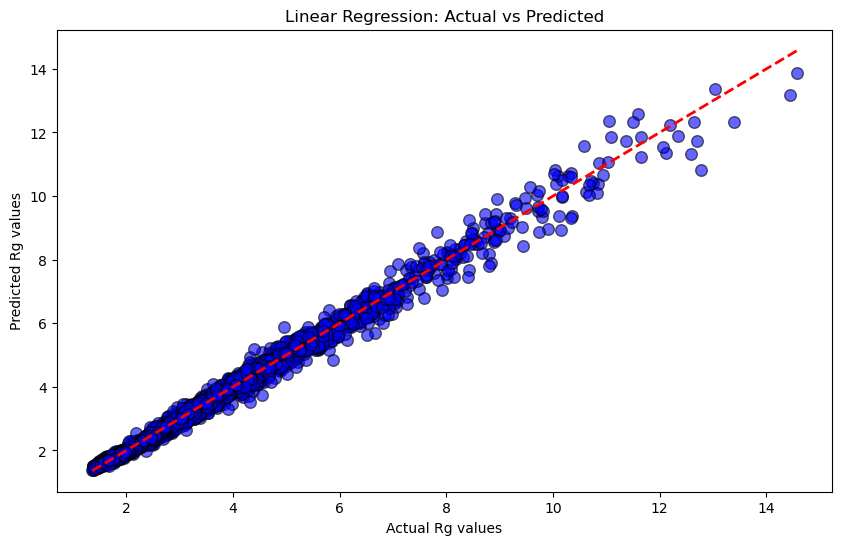

In [4]:
#thankGOD! polynomial model
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
import joblib

# Replace 'your_file.csv' with the path to your CSV file
#df = pd.read_csv('df_validation_IDRome90.csv')
df = pd.read_csv('IDRome_DB.csv', usecols=['Rg/nm','nu','N'])
# with just one feature 'Ree' we can perfectily predict Rg
#df = pd.read_csv('IDRome_DB.csv', usecols=['Rg/nm','Ree/nm'])



# Separate the target (Rg) and features
X = df.drop(columns=['Rg/nm'])  # Features (all columns except 'Rg')
y = df['Rg/nm']  # Target (only the 'Rg' column)
#print(y)
# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#print(X_train)
#print(y_train)
#print(X_test.shape)
#print(y_test.shape)

# Using a polynomial degree of 2 for demonstration
poly_model = make_pipeline(PolynomialFeatures(degree=5), LinearRegression())
poly_model.fit(X_train, y_train)
y_pred_poly = poly_model.predict(X_test)

# to save the trained model
joblib.dump(poly_model, 'poly_model.joblib')

# Evaluate the model
mse = mean_squared_error(y_test, y_pred_poly)
r2 = r2_score(y_test, y_pred_poly)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Visualization of results
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_poly, color='blue', edgecolor='k', alpha=0.6, s=70)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Rg values')
plt.ylabel('Predicted Rg values')
plt.title('Linear Regression: Actual vs Predicted')
plt.show()

(65, 2)
(65,)
Mean Squared Error: 0.18171627604577503
R-squared: 0.8431605409745297


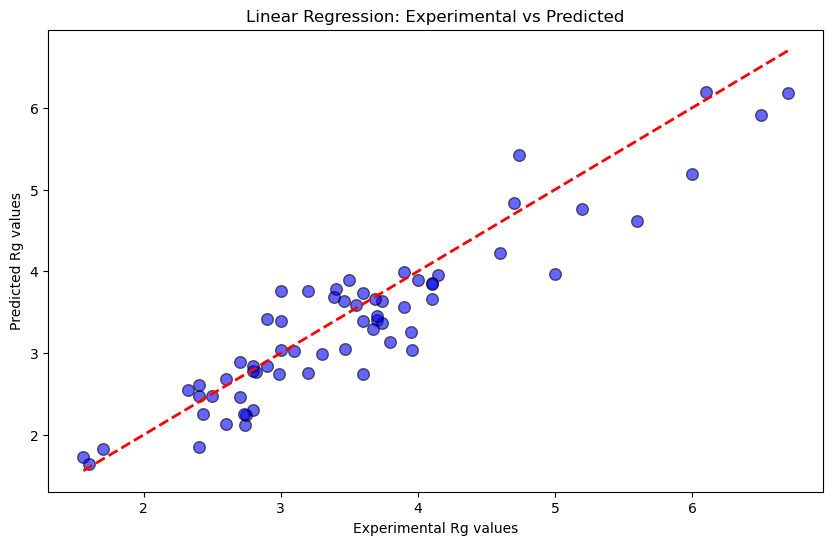

In [30]:
# our model to predic experimental Rg of 64 samples (exp)
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import joblib


# Load the saved model
loaded_model = joblib.load('poly_model.joblib')

# Replace 'your_file.csv' with the path to your CSV file
#df = pd.read_csv('df_validation_IDRome90.csv')
df = pd.read_csv('rg_test_data.csv', usecols=['exp_rg','nu','N'])

# Separate the target (Rg) and features
X_test_new = df.drop(columns=['exp_rg'])  # Features (all columns except 'Rg')
y_test_new = df['exp_rg']  # Target (only the 'Rg' column)
#print(y)
# Step 2: Split the data into training and testing sets
#X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new, test_size=0.2, random_state=42)
#print(X_train_new.shape)
#print(y_train.shape)
print(X_test_new.shape)
print(y_test_new.shape)

# Initialize and train the Linear Regression model
#model = LinearRegression()
#model.fit(X_train, y_train)

# Make predictions using the loaded model
y_pred_new = loaded_model.predict(X_test_new)
#print(y_pred_new.shape)
# Evaluate the model
mse = mean_squared_error(y_test_new, y_pred_new)
r2 = r2_score(y_test_new, y_pred_new)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Visualization of results
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test_new, y_pred_new, color='blue', edgecolor='k', alpha=0.6, s=70)
plt.plot([y_test_new.min(), y_test_new.max()], [y_test_new.min(), y_test_new.max()], 'r--', lw=2)
plt.xlabel('Experimental Rg values')
plt.ylabel('Predicted Rg values')
plt.title('Linear Regression: Experimental vs Predicted')
plt.show()


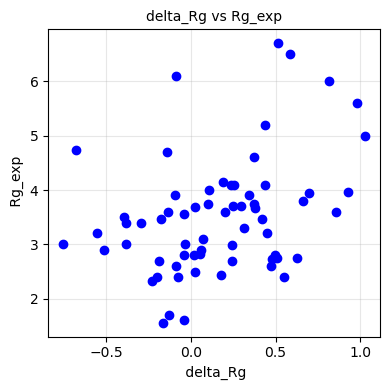

In [37]:
#thankGOD! delta Rg for 64 experimental Rg and predicted ########################after finding model prediction on exp rg
import numpy as np

Rg_exp = np.array (y_test_new)
Rg_pred = np.array (y_pred_new)
#print(Rg_exp)
#print(Rg_pred)

#delta_Cs = Cs_exp - Cs_pred
delta_Rg=[]

for i in range (len(y_test_new)):
    #print (delta_Rg[i])
    delta_Rg.append( Rg_exp[i] - Rg_pred[i])
    
#print (len(Rg_exp))

# Plotting
fig, ax = plt.subplots(figsize=(4,4))
#xs = np.arange(-3.0,3.0,0.01)
#ax.plot(xs,xs,color='black',lw=1.5)

#plt.figure(figsize=(10, 6))
#plt.scatter(delta, x_values, color='b', s=100, alpha=0.7)

ax.plot(delta_Rg, Rg_exp,'o',color='b')#,fillstyle='none')
# Annotating the points
#for i, label in enumerate(labels):
    #plt.text(delta[i], x_values[i], label, fontsize=9)
'''
plt.title('Scatter Plot of delta Cs')
plt.xlabel('Cs exp')
plt.ylabel('delta Cs')

plt.grid(True)
plt.tight_layout()
plt.show()
'''

ax.set(xlabel=f' delta_Rg', ylabel=f' Rg_exp')
ax.set_title('delta_Rg vs Rg_exp',fontsize=10)
ax.grid(alpha=0.3)

fig.tight_layout()

Mean Squared Error: 11.04095116923214
R-squared: -65.43216810082048


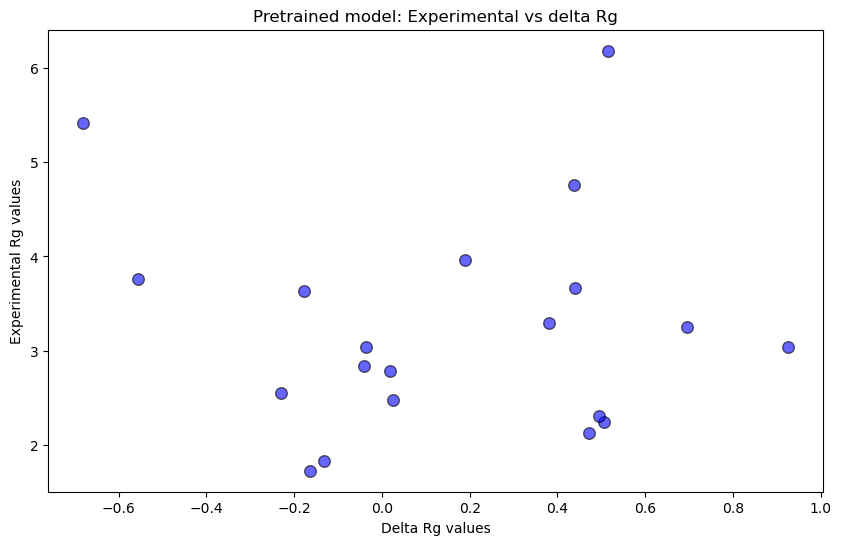

In [44]:
############################################ to predict delta Rg #########################################################

# Load the saved model
loaded_model = joblib.load('poly_model.joblib')

X_deltaRg = X_test_new # input is like bedfor. the 64 exp samples and 2 features (65,2)
y_deltaRg = delta_Rg  # Target here is not Rg and is delta Rg (65,)
#print(len(y_deltaRg))

# Step 2: Split the data into training and testing sets
X_train_deltaRg, X_test_deltaRg, y_train_deltaRg, y_test_deltaRg = train_test_split(X_deltaRg, y_deltaRg, test_size=0.3, random_state=42)
#print(len(y_test_deltaRg))
#print(y_train2.shape)
#print(X_test2.shape)
#print(y_test2.shape)



# Predict on the test set
y_pred_deltaRg = loaded_model.predict(X_test_deltaRg)

# Evaluate the model
mse = mean_squared_error(y_test_deltaRg, y_pred_deltaRg)
r2 = r2_score(y_test_deltaRg, y_pred_deltaRg)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Visualization of results
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test_deltaRg, y_pred_deltaRg, color='blue', edgecolor='k', alpha=0.6, s=70)
#plt.plot([y_test_deltaRg.min(), y_test_deltaRg.max()], [y_test_deltaRg.min(), y_test_deltaRg.max()], 'r--', lw=2)
plt.xlabel('Delta Rg values')
plt.ylabel('Experimental Rg values')
plt.title('Pretrained model: Experimental vs delta Rg')
plt.show()

[0.16667716 0.18103831 0.14937594 0.1641894  0.15276833 0.18239526
 0.15616073 0.15491685 0.19856569 0.15955313 0.16079701 0.15446453
 0.16204088 0.15502993 0.16079701 0.15864849 0.1512983  0.15683921
 0.16204088 0.15423837]
Lasso MSE: 0.16635969114138122
Lasso R-squared: -0.0009676519449197674


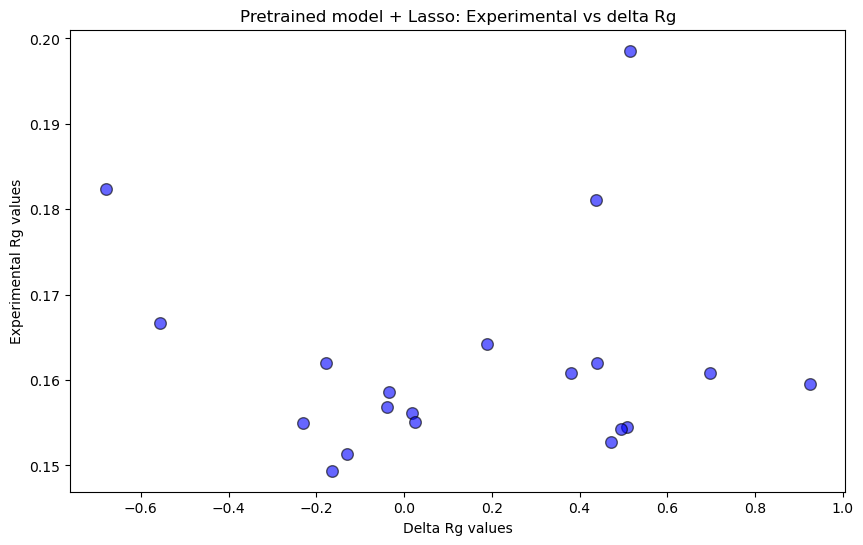

In [60]:
############################################ to predict delta Rg #########################################################
# Lasso regularization it is on the (y_pred) prediction of  pretrained model (polynomial)) which is used in delta Rg= y_exo-y_predic 
from sklearn.linear_model import Lasso


X_deltaRg = X_test_new # input is like bedfor. the 64 exp samples and 2 features (65,2)
y_deltaRg = delta_Rg  # Target here is not Rg and is delta Rg (65,)
#print(len(y_deltaRg))

# Step 2: Split the data into training and testing sets
X_train_deltaRg, X_test_deltaRg, y_train_deltaRg, y_test_deltaRg = train_test_split(X_deltaRg, y_deltaRg, test_size=0.3, random_state=42)
#print(len(y_test_deltaRg))
#print(y_train2.shape)
#print(X_test2.shape)
#print(y_test2.shape)


# Initialize the Lasso Regression model with a small regularization parameter
lasso_model = Lasso(alpha=0.01)  # Adjust alpha as needed
lasso_model.fit(X_train_deltaRg, y_train_deltaRg)
#print(X_train_deltaRg,'',y_train_deltaRg)
# Predict on the test set
y_pred_lasso = lasso_model.predict(X_test_deltaRg)
print(y_pred_lasso)
# Evaluate the model
mse_lasso = mean_squared_error(y_test_deltaRg, y_pred_lasso)
r2_lasso = r2_score(y_test_deltaRg, y_pred_lasso)
print("Lasso MSE:", mse_lasso)
print("Lasso R-squared:", r2_lasso)

# Visualization of results
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test_deltaRg, y_pred_lasso, color='blue', edgecolor='k', alpha=0.6, s=70)
#plt.plot([y_test_deltaRg.min(), y_test_deltaRg.max()], [y_test_deltaRg.min(), y_test_deltaRg.max()], 'r--', lw=2)
plt.xlabel('Delta Rg values')
plt.ylabel('Experimental Rg values')
plt.title('Pretrained model + Lasso: Experimental vs delta Rg')
plt.show()

Standardize Features: If you haven't already, standardize your features (using StandardScaler from sklearn.preprocessing) to ensure they’re on a similar scale, as Lasso can be sensitive to feature scaling.

Check Feature Importance: After fitting the model, you can check which coefficients are non-zero by printing lasso_model.coef_. This will help you see which features Lasso is selecting as relevant for prediction.

### ThankGOD! I could calculate some more features of these 64 exp samples using Wenwei seq2nu.py code. So now I can train both the model of 28000 samples with their 7 more features and then use that pretrained model to test these 64 exp samples with their 7 more features. thankGOD!

In [2]:
%cd /media/saeed/Expansion/ASU/md-intro-tutorial/ml_project/Keresten/data/Rg/

/media/saeed/Expansion/ASU/md-intro-tutorial/ml_project/Keresten/data/Rg


#### Main model with more features

         N  mean_lambda       shd        scd      ncpr
0       37     0.438338  2.788687  -0.111435  0.000000
1       32     0.618239  3.760279   0.473346  0.125000
2       67     0.418639  3.254698  -0.643791 -0.014925
3      132     0.466702  4.187891  -0.718322  0.015152
4       46     0.405640  2.756532   1.764567  0.152174
...    ...          ...       ...        ...       ...
28053  181     0.469775  4.484816   2.211021  0.060773
28054  254     0.530051  5.423090  14.358773  0.114173
28055  109     0.452929  3.835643  -0.473314  0.018349
28056  113     0.452609  3.896610  -0.321785 -0.026549
28057  127     0.451631  3.984828   1.140766  0.062992

[28058 rows x 5 columns]
Mean Squared Error: 0.065861669844614
R-squared: 0.9756209109486981


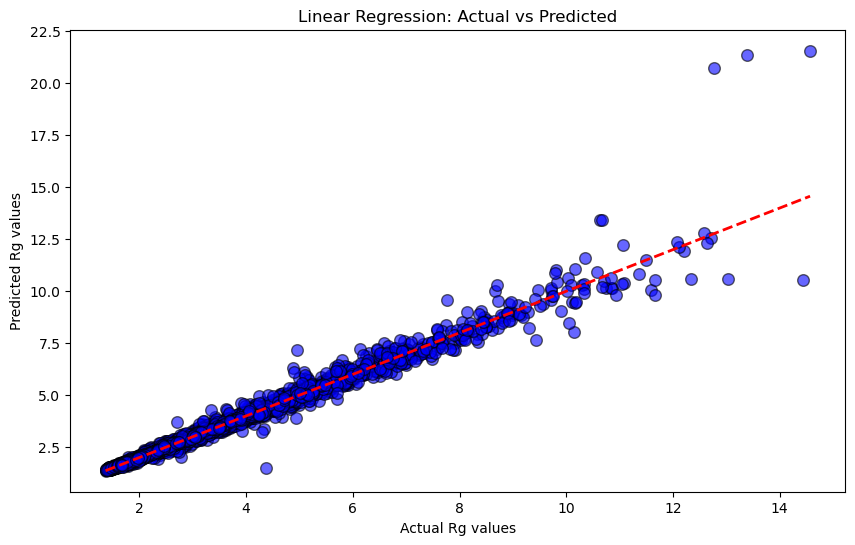

In [21]:
#thankGOD! polynomial model
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
import joblib

# Replace 'your_file.csv' with the path to your CSV file
#df = pd.read_csv('df_validation_IDRome90.csv')
df = pd.read_csv('IDRome_DB.csv', usecols=['Rg/nm','N','shd','scd','mean_lambda','ncpr'])
# with just one feature 'Ree' we can perfectily predict Rg
#df = pd.read_csv('IDRome_DB.csv', usecols=['Rg/nm','Ree/nm'])



# Separate the target (Rg) and features
X = df.drop(columns=['Rg/nm'])  # Features (all columns except 'Rg')
print(X)
y = df['Rg/nm']  # Target (only the 'Rg' column)
#print(y)
# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#print(X_train)
#print(y_train)
#print(X_test.shape)
#print(y_test.shape)

# Using a polynomial degree of 2 for demonstration
poly_model = make_pipeline(PolynomialFeatures(degree=5), LinearRegression())
poly_model.fit(X_train, y_train)
y_pred_poly = poly_model.predict(X_test)

# to save the trained model
joblib.dump(poly_model, 'poly_model.joblib')

# Evaluate the model
mse = mean_squared_error(y_test, y_pred_poly)
r2 = r2_score(y_test, y_pred_poly)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Visualization of results
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_poly, color='blue', edgecolor='k', alpha=0.6, s=70)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Rg values')
plt.ylabel('Predicted Rg values')
plt.title('Linear Regression: Actual vs Predicted')
plt.show()

#### testing the main model on exp samples with more features

      N  mean_lambda      shd      scd     ncpr
0    32      0.57853  3.52776  3.42417 -0.28125
1    38      0.62813  4.03895  0.14171  0.05263
2    46      0.54891  3.72476  0.99091  0.17391
3    49      0.55673  3.80503  0.66242  0.13265
4    61      0.67359  4.94313 -0.32873  0.05738
..  ...          ...      ...      ...      ...
60  312      0.73079  7.79006 -0.24318  0.00641
61  324      0.60285  6.46971  1.21895  0.03086
62  373      0.68615  7.58054  7.25906 -0.06702
63  412      0.64152  7.18932  3.81536 -0.06189
64  467      0.65076  7.45472 -4.92822  0.03319

[65 rows x 5 columns]
Mean Squared Error: 3.561680584044173
R-squared: -2.0740892790599155


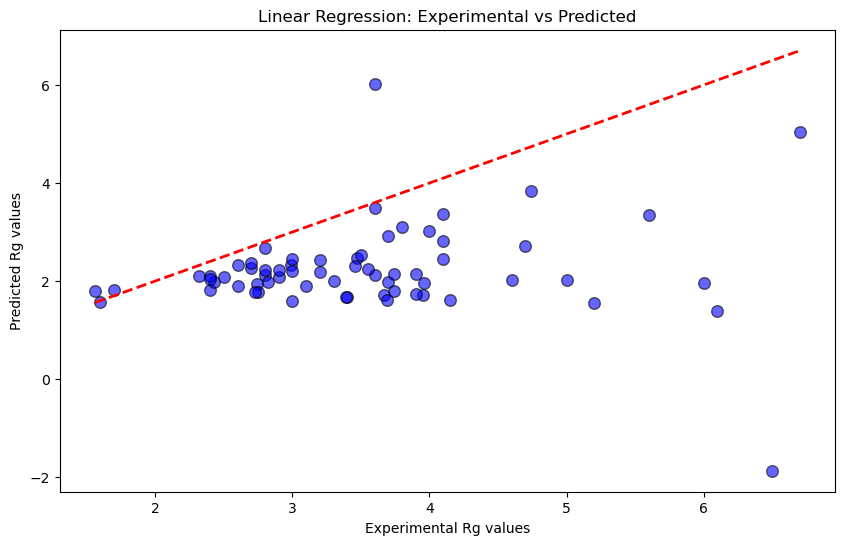

In [22]:
# our model to predic experimental Rg of 64 samples (exp)
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import joblib


# Load the saved model
loaded_model = joblib.load('poly_model.joblib')

# Replace 'your_file.csv' with the path to your CSV file
#df = pd.read_csv('df_validation_IDRome90.csv')
df = pd.read_csv('rg_test_data_features2.csv', usecols=['exp_rg','N','shd','scd','mean_lambda','ncpr'])

# Separate the target (Rg) and features
X_test_new = df.drop(columns=['exp_rg'])  # Features (all columns except 'Rg')
print(X_test_new)
y_test_new = df['exp_rg']  # Target (only the 'Rg' column)
#print(y)
# Step 2: Split the data into training and testing sets
#X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new, test_size=0.2, random_state=42)
#print(X_train_new.shape)
#print(y_train.shape)
#print(X_test_new.shape)
#print(y_test_new.shape)

# Initialize and train the Linear Regression model
#model = LinearRegression()
#model.fit(X_train, y_train)

# Make predictions using the loaded model
y_pred_new = loaded_model.predict(X_test_new)
#print(y_pred_new.shape)
# Evaluate the model
mse = mean_squared_error(y_test_new, y_pred_new)
r2 = r2_score(y_test_new, y_pred_new)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Visualization of results
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test_new, y_pred_new, color='blue', edgecolor='k', alpha=0.6, s=70)
plt.plot([y_test_new.min(), y_test_new.max()], [y_test_new.min(), y_test_new.max()], 'r--', lw=2)
plt.xlabel('Experimental Rg values')
plt.ylabel('Predicted Rg values')
plt.title('Linear Regression: Experimental vs Predicted')
plt.show()


### Thank GOD! using the Keresten colab code "IDRLab.ipynb" I could get 11 more features. thankGOD! I will use them here for both main model and
for testing of 64 exp

In [2]:
%cd /media/saeed/Expansion/ASU/md-intro-tutorial/ml_project/Keresten/data/Rg/

/media/saeed/Expansion/ASU/md-intro-tutorial/ml_project/Keresten/data/Rg


Mean Squared Error: 0.01064217710804363
R-squared: 0.9960607348093538


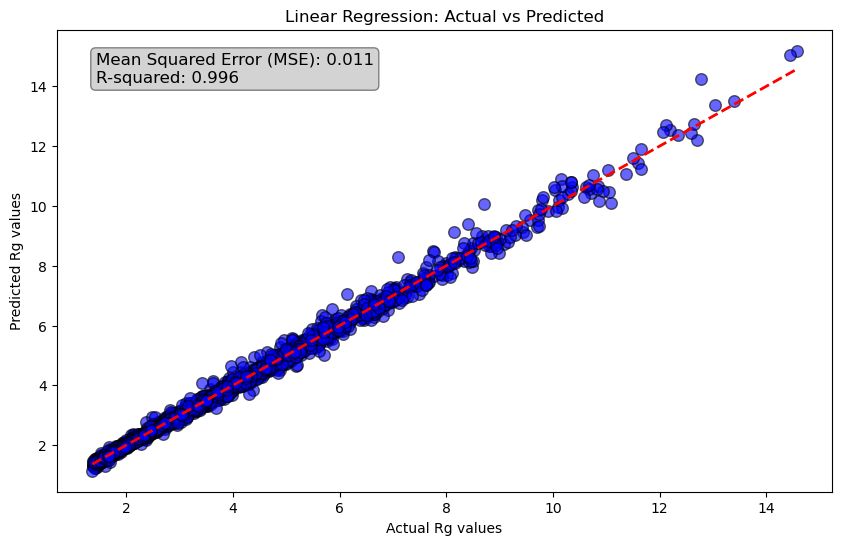

In [23]:
#thankGOD! polynomial model
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
import joblib

# Replace 'your_file.csv' with the path to your CSV file
#df = pd.read_csv('df_validation_IDRome90.csv')
df = pd.read_csv('IDRome_DB.csv', usecols=['Rg/nm','N','shd','scd','mean_lambda','ncpr','fK', 'fR', 'fE', 'fD',	'faro','kappa','fcr'])
# with just one feature 'Ree' we can perfectily predict Rg
#df = pd.read_csv('IDRome_DB.csv', usecols=['Rg/nm','Ree/nm'])



# Separate the target (Rg) and features
X = df.drop(columns=['Rg/nm'])  # Features (all columns except 'Rg')
#print(X)
y = df['Rg/nm']  # Target (only the 'Rg' column)
#print(y)
# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#print(X_train)
#print(y_train)
#print(X_test.shape)
#print(y_test.shape)

# Using a polynomial degree of 2 for demonstration
poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_model.fit(X_train, y_train)
y_pred_poly = poly_model.predict(X_test)

# to save the trained model
joblib.dump(poly_model, 'poly_model.joblib')

# Evaluate the model
mse = mean_squared_error(y_test, y_pred_poly)
r2 = r2_score(y_test, y_pred_poly)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Visualization of results
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_poly, color='blue', edgecolor='k', alpha=0.6, s=70)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Rg values')
plt.ylabel('Predicted Rg values')
plt.title('Linear Regression: Actual vs Predicted')

# Display MSE and R-squared inside the plot
text_str = f'Mean Squared Error (MSE): {mse:.3f}\nR-squared: {r2:.3f}'
plt.text(0.05, 0.95, text_str, transform=plt.gca().transAxes, fontsize=12,
         verticalalignment='top', bbox=dict(boxstyle="round,pad=0.3", edgecolor='gray', facecolor='lightgray'))

plt.show()

Mean Squared Error: 0.15910073614617723
R-squared: 0.8626800310312617


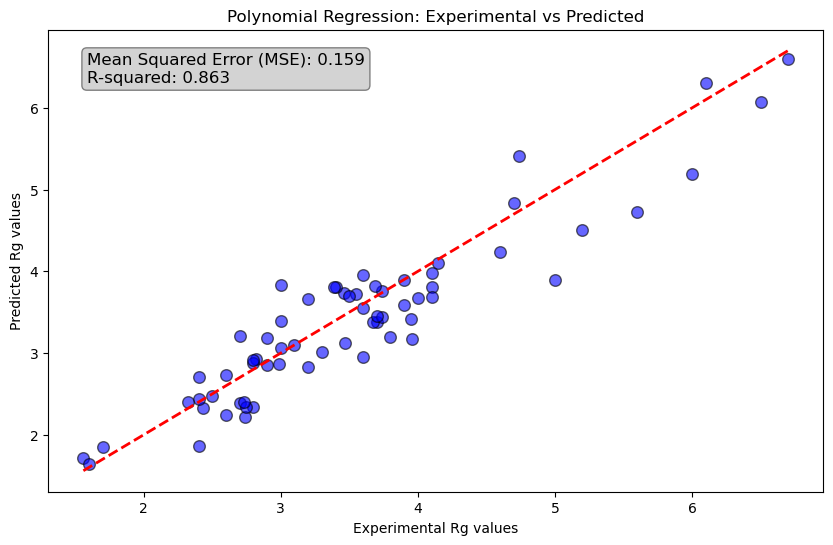

In [25]:
# our model to predic experimental Rg of 64 samples (exp)
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import joblib


# Load the saved model
loaded_model = joblib.load('poly_model.joblib')


df = pd.read_csv('rg_test_data_features3_keresten.csv', usecols=['exp_rg','N','shd','scd','mean_lambda','ncpr','fK', 'fR', 'fE', 'fD',	'faro','kappa','fcr'])

# Separate the target (Rg) and features
X_test_new = df.drop(columns=['exp_rg'])  # Features (all columns except 'Rg')
y_test_new = df['exp_rg']  # Target (only the 'Rg' column)


# Make predictions using the loaded model
y_pred_new = loaded_model.predict(X_test_new)
#print(y_pred_new.shape)
# Evaluate the model
mse = mean_squared_error(y_test_new, y_pred_new)
r2 = r2_score(y_test_new, y_pred_new)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Visualization of results
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test_new, y_pred_new, color='blue', edgecolor='k', alpha=0.6, s=70)
plt.plot([y_test_new.min(), y_test_new.max()], [y_test_new.min(), y_test_new.max()], 'r--', lw=2)
plt.xlabel('Experimental Rg values')
plt.ylabel('Predicted Rg values')
plt.title('Polynomial Regression: Experimental vs Predicted')

# Display MSE and R-squared inside the plot
text_str = f'Mean Squared Error (MSE): {mse:.3f}\nR-squared: {r2:.3f}'
plt.text(0.05, 0.95, text_str, transform=plt.gca().transAxes, fontsize=12,
         verticalalignment='top', bbox=dict(boxstyle="round,pad=0.3", edgecolor='gray', facecolor='lightgray'))

plt.show()